In [33]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#load data with names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df_iris=pd.read_csv(r'C:\Users\Daniy\Desktop\Stevens Books\CS 559\iris.data',names=names)

In [35]:
#check Head
df_iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
#Seperate features and Targets
X = df_iris.iloc[:, 0:4].values
y = df_iris.iloc[:, 4].values

In [37]:
#Split the Data into training set and test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
#Measure accuracy of prediction
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 11 using brute is 96.66666666666667


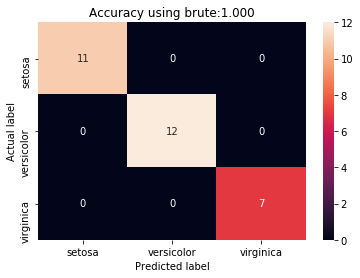

In [39]:
# Create the confusion matrix table to see accuracy of prediction.
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()